# 相似度筛选

In [1]:
import os
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,QuantileTransformer
from sklearn.metrics.pairwise import cosine_similarity
import json

In [2]:
# 加载数据
df = pd.read_csv(r"F:\cache_data\frequency_filter\dy\dy_frequency_filter_2024_417.csv")

In [3]:
df.fillna(df.select_dtypes(include='number').mean(),inplace=True)

In [4]:
df.columns

Index(['TL', 'YL', 'TS', 'TZ', 'LON', 'LAT', 'label', 'DEM',
       'AnalyticalHillshading', 'Aspect', 'ChannelNetworkBaseLevel',
       'ChannelNetworkDistance', 'ClosedDepressions', 'ConvergenceIndex',
       'LSFactor', 'PlanCurvature', 'ProfileCurvature',
       'RelativeSlopePosition', 'Slope', 'TopographicWetnessIndex',
       'TotalCatchmentArea', 'ValleyDepth', 'Contrast', 'Correlation',
       'Dissimilarity', 'Entropy', 'Homogeneity', 'Mean', 'ndvi', 'PCA_0',
       'PCA_1', 'SecondMoment', 'Variance', 'PRE', 'SRA', 'TMP', 'VAP', 'WIND',
       'BIO', 'LON.1', 'LAT.1', 'PH', 'DZ', 'DL', 'MRRTF', 'MRVBF'],
      dtype='object')

In [5]:
# 区分点位
no_calc_df = df[df['label']=='inner']
train_df = df[df['label']=='fish_net']

In [6]:
feature_columns = ['DEM',
       'AnalyticalHillshading', 'Aspect', 'ChannelNetworkBaseLevel',
       'ChannelNetworkDistance', 'ConvergenceIndex',
       'LSFactor', 'PlanCurvature', 'ProfileCurvature',
       'RelativeSlopePosition', 'Slope', 'TopographicWetnessIndex',
       'TotalCatchmentArea', 'ValleyDepth', 'Contrast', 'Correlation',
       'Dissimilarity', 'Entropy', 'Homogeneity', 'Mean', 'ndvi', 'PCA_0',
       'PCA_1', 'SecondMoment', 'Variance', 'PRE', 'SRA', 'TMP', 'VAP', 'WIND',
       'BIO','PH', 'DZ', 'DL', 'MRRTF', 'MRVBF']

In [7]:
# 标签值
label_column = 'TZ'

In [8]:
# 获取标签的唯一值
label_values = train_df[label_column].unique()

# 初始化用于存储代表性样本的列表
representative_samples = []

# 设置相似度阈值
threshold = 0.9  # 根据需要调整

# 遍历每个标签值
for label_value in label_values:
    # 提取当前标签值的样本
    label_df = train_df[train_df[label_column] == label_value]
    
    # 检查样本数量
    num_samples = len(label_df)
    if num_samples == 1:
        # 如果样本数量为1，直接添加该样本
        representative_samples.append(label_df.iloc[0].values)
    else:
        # 对特征进行标准化
        scaler = StandardScaler()
        # scaler = MinMaxScaler()
        # scaler = MaxAbsScaler()
        # scaler = QuantileTransformer()
        features_scaled = scaler.fit_transform(label_df[feature_columns])

        # 计算样本间的余弦相似度
        similarity_matrix = cosine_similarity(features_scaled)

        # 初始化用于存储选定样本索引的集合
        selected_samples = set()

        # 遍历相似度矩阵，选择相似度高于阈值的样本
        for i in range(len(similarity_matrix)):
            for j in range(i + 1, len(similarity_matrix)):
                if similarity_matrix[i, j] > threshold:
                    selected_samples.add(i)
                    selected_samples.add(j)

        if len(selected_samples) == 0:
            print(label_value, f"共有样本{label_df.shape[0]}个","没有找到相似的样本")
            # 如果selected_samples为空，添加相似度最高的15%的样本
            num_to_add = math.ceil(0.75 * num_samples)
            if num_to_add > 0:
                top_indices = similarity_matrix.sum(axis=0).argsort()[::-1][:num_to_add]
                selected_samples.update(top_indices)

        # 从原始样本中提取选定的样本
        selected_samples_indices = label_df.index[list(selected_samples)]
        representative_samples.extend(df.loc[selected_samples_indices].values)

# 转换为 DataFrame 并显示部分结果
representative_samples_df = pd.DataFrame(representative_samples, columns=df.columns)


厚腐殖层中土层黄色石灰土 共有样本26个 没有找到相似的样本
火石沙土 共有样本23个 没有找到相似的样本
黑潮泥田 共有样本19个 没有找到相似的样本
干鸭屎泥田 共有样本46个 没有找到相似的样本
石碴子土 共有样本18个 没有找到相似的样本
小泥土 共有样本39个 没有找到相似的样本
黄胶泥田 共有样本26个 没有找到相似的样本
冷沙田 共有样本8个 没有找到相似的样本
偏沙土 共有样本12个 没有找到相似的样本
薄腐殖层中土层酸性紫色土 共有样本19个 没有找到相似的样本
大泥田 共有样本42个 没有找到相似的样本
重白鳝泥田 共有样本7个 没有找到相似的样本
潮板沙田 共有样本15个 没有找到相似的样本
浅足烂泥田 共有样本41个 没有找到相似的样本
龙凤大眼泥田 共有样本6个 没有找到相似的样本
薄腐殖层厚土层紫色土 共有样本12个 没有找到相似的样本
锈水田 共有样本4个 没有找到相似的样本
薄腐殖层厚土层黑色石灰土 共有样本4个 没有找到相似的样本
砾质紫沙土 共有样本3个 没有找到相似的样本
熟鸭屎泥田 共有样本19个 没有找到相似的样本
薄腐殖层中土层次生黄色石灰土 共有样本64个 没有找到相似的样本
死黄泥田 共有样本13个 没有找到相似的样本
薄腐殖层中土层紫色土 共有样本5个 没有找到相似的样本
马血泥田 共有样本3个 没有找到相似的样本
湿鸭屎泥田 共有样本20个 没有找到相似的样本
冷沙土 共有样本8个 没有找到相似的样本
薄腐殖层中土层黄壤性土 共有样本34个 没有找到相似的样本
白沙泥田 共有样本11个 没有找到相似的样本
白云沙土 共有样本5个 没有找到相似的样本
扁沙泥田 共有样本2个 没有找到相似的样本
薄腐殖层薄土层铁质黄壤 共有样本2个 没有找到相似的样本
岩泥 共有样本5个 没有找到相似的样本
重白胶泥田 共有样本15个 没有找到相似的样本
冷水田 共有样本3个 没有找到相似的样本
雾黄泥田 共有样本14个 没有找到相似的样本
深足烂泥田 共有样本16个 没有找到相似的样本
中白鳝泥田 共有样本5个 没有找到相似的样本
小黄泥土 共有样本142个 没有找到相似的样本
黄油沙泥田 共有样本7个 没有找到相似的样本
铅毒田 共有样本2个 没有找到相似的样本
苦大泥田 共有样本3个 没有找到相似的样本
薄腐殖薄土层山地灌丛草甸

In [9]:
len(representative_samples_df)

3965

In [10]:
# 检查类别是否丢失
old_type = train_df[label_column].value_counts()
new_type = representative_samples_df[label_column].value_counts()
old_type.shape,new_type.shape

((85,), (85,))

In [11]:
representative_samples_df

,TL,YL,TS,TZ,LON,LAT,label,DEM,AnalyticalHillshading,Aspect,...,VAP,WIND,BIO,LON.1,LAT.1,PH,DZ,DL,MRRTF,MRVBF
0,黄壤,黄壤,硅铁质黄壤,薄腐殖层厚土层硅铁质黄壤,107.445753,25.858703,fish_net,1021.6,0.186124,5.645218,...,1.540833,1.683333,195.54823,444445.0,2861300.0,5.476191,9,7,0.044808,0.034154
1,黄壤,黄壤,硅铁质黄壤,薄腐殖层厚土层硅铁质黄壤,107.729121,26.273806,fish_net,701.7,1.216353,2.768598,...,1.587500,1.583333,191.06468,472945.0,2907200.0,6.843954,4,3,0.107800,0.401106
2,黄壤,黄壤,硅铁质黄壤,薄腐殖层厚土层硅铁质黄壤,107.738131,26.273823,fish_net,661.0,0.785157,5.674496,...,1.588333,1.583333,191.17732,473845.0,2907200.0,6.713590,4,39,0.001712,2.977505
3,黄壤,黄壤,硅铁质黄壤,薄腐殖层厚土层硅铁质黄壤,107.741135,26.273828,fish_net,671.3,1.395903,3.062213,...,1.588333,1.583333,191.17732,474145.0,2907200.0,6.544618,5,7,0.000663,0.008529
4,黄壤,黄壤,硅铁质黄壤,薄腐殖层厚土层硅铁质黄壤,107.433756,25.864072,fish_net,1031.5,0.443475,4.917029,...,1.555833,1.658333,194.86105,443245.0,2861900.0,5.441568,3,7,0.053385,0.148414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,山地灌丛草甸土,山地灌丛草甸土,山地灌丛草甸土,薄腐殖层中土层山地灌丛草甸土,107.341137,26.370025,fish_net,1646.3,1.134341,1.592065,...,1.260000,2.100000,192.85692,434245.0,2918000.0,5.110536,3,7,0.070845,0.516262
3961,山地灌丛草甸土,山地灌丛草甸土,山地灌丛草甸土,薄腐殖层中土层山地灌丛草甸土,107.344143,26.370039,fish_net,1600.5,0.950942,1.269871,...,1.300000,2.000000,191.90393,434545.0,2918000.0,5.209802,3,7,0.291504,0.559757
3962,山地灌丛草甸土,山地灌丛草甸土,山地灌丛草甸土,薄腐殖层中土层山地灌丛草甸土,107.332105,26.372691,fish_net,1656.4,0.719550,0.394788,...,1.274167,2.066667,192.62935,433345.0,2918300.0,5.140053,3,7,0.256296,0.704511
3963,山地灌丛草甸土,山地灌丛草甸土,山地灌丛草甸土,薄腐殖层中土层山地灌丛草甸土,107.335110,26.372705,fish_net,1630.9,0.629897,0.141897,...,1.260000,2.100000,192.85692,433645.0,2918300.0,5.111474,3,7,0.251782,0.509783


In [12]:
# 再合并
result_df = pd.concat([representative_samples_df,no_calc_df],ignore_index=True)
# result_df = result_df.drop(columns=['label'])

In [13]:
result_df

,TL,YL,TS,TZ,LON,LAT,label,DEM,AnalyticalHillshading,Aspect,...,VAP,WIND,BIO,LON.1,LAT.1,PH,DZ,DL,MRRTF,MRVBF
0,黄壤,黄壤,硅铁质黄壤,薄腐殖层厚土层硅铁质黄壤,107.445753,25.858703,fish_net,1021.6,0.186124,5.645218,...,1.540833,1.683333,195.54823,444445.0,2861300.0,5.476191,9,7,0.044808,0.034154
1,黄壤,黄壤,硅铁质黄壤,薄腐殖层厚土层硅铁质黄壤,107.729121,26.273806,fish_net,701.7,1.216353,2.768598,...,1.587500,1.583333,191.06468,472945.0,2907200.0,6.843954,4,3,0.107800,0.401106
2,黄壤,黄壤,硅铁质黄壤,薄腐殖层厚土层硅铁质黄壤,107.738131,26.273823,fish_net,661.0,0.785157,5.674496,...,1.588333,1.583333,191.17732,473845.0,2907200.0,6.713590,4,39,0.001712,2.977505
3,黄壤,黄壤,硅铁质黄壤,薄腐殖层厚土层硅铁质黄壤,107.741135,26.273828,fish_net,671.3,1.395903,3.062213,...,1.588333,1.583333,191.17732,474145.0,2907200.0,6.544618,5,7,0.000663,0.008529
4,黄壤,黄壤,硅铁质黄壤,薄腐殖层厚土层硅铁质黄壤,107.433756,25.864072,fish_net,1031.5,0.443475,4.917029,...,1.555833,1.658333,194.86105,443245.0,2861900.0,5.441568,3,7,0.053385,0.148414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,黄壤,黄泥土,黄沙泥土,黄沙泥土,107.514466,26.396067,inner,984.5,0.905172,3.419885,...,1.489167,1.708333,189.20451,451555.0,2920805.0,5.539885,10,9,2.807610,0.755167
5579,石灰土,大土泥,大土泥,大泥土,107.286874,26.264577,inner,1308.2,0.549022,4.897726,...,1.375000,1.900000,191.19537,428765.0,2906345.0,5.938250,4,7,0.561413,0.351658
5580,石灰土,大土泥,大土泥,大泥土,107.293529,26.262811,inner,1384.3,1.375126,2.949196,...,1.380000,1.908333,191.05931,429425.0,2906145.0,5.412776,4,9,0.005574,0.003742
5581,石灰土,黑色石灰土,黑色石灰土,薄腐殖层薄土层黑色石灰土,107.284239,26.254759,inner,1358.7,0.766001,4.187584,...,1.354167,1.925000,191.71070,428495.0,2905255.0,5.489189,4,7,0.205975,0.360540


In [14]:
out_path = r"F:\cache_data\frequency_filter\dy\scaler_csv"
result_df.to_csv(os.path.join(out_path,'dy_stander_filter_all_type_20240417.csv'),index=False)

In [20]:
df_filter = pd.read_csv(r"F:\cache_data\frequency_filter\dy\scaler_csv\dy_stander_filter_all_type_20240417.csv")

# 分类系统更新

In [38]:
# 字典
json_file_path = 'D:\worker_code\Terrain_Test\data\soil_dict\soil_dict.json'
# 读取字典
with open(json_file_path, 'r', encoding='utf-8') as json_file:
    loaded_dict = json.load(json_file)

In [39]:
# 表
df_path = r"F:\cache_data\frequency_filter\dy\scaler_csv\dy_stander_filter_all_type.csv"
df = pd.read_csv(df_path)

In [40]:
# 获取当前的土种信息
tz_list = list(df['TZ'].unique())

In [41]:
# 检查tz_list中的土种是否在对照字典中
check_list = [x in loaded_dict for x in tz_list]
in_dict = check_list.count(True)
not_in_dict = check_list.count(False)
in_dict,not_in_dict

(18, 67)

In [42]:
# 获取现有数据土种字典
tz_dict = df.groupby('TZ').apply(lambda x: x[['TL', 'YL', 'TS']].drop_duplicates().to_dict(orient='records')).to_dict()


In [46]:

dfs = []

# 遍历字典，将每个分组的数据转换为 DataFrame 并添加到列表中
for tz, records in tz_dict.items():
    # 将 records 转换为 DataFrame
    df_temp = pd.DataFrame(records)
    # 添加 'TZ' 列，并设置值为当前的 tz
    df_temp['TZ'] = tz
    # 将 df_temp 添加到列表中
    dfs.append(df_temp)

# 使用 pd.concat 将所有的 DataFrame 连接起来
df_new = pd.concat(dfs, ignore_index=True)

# 重置索引
df_new.reset_index(drop=True, inplace=True)


In [48]:
df_new.to_excel(r"C:\Users\Runker\Desktop\test2.xlsx",index=False)

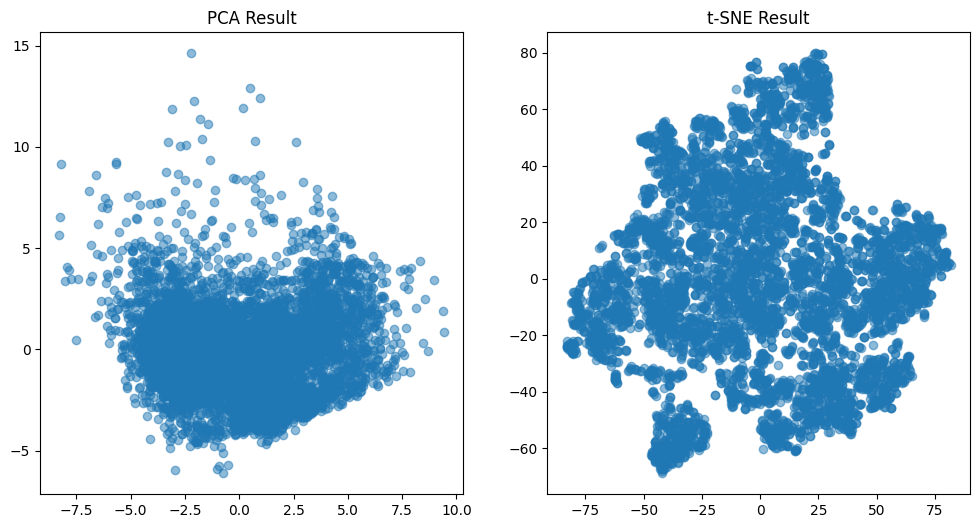

(array([[ 0.44389876,  0.41542511,  4.59090058, ...,  0.14469835,
         -0.10485392,  0.0347236 ],
        [-4.47852685, -1.22168342,  0.20931039, ...,  0.10027362,
         -0.01773527,  0.03416027],
        [-7.40781406,  3.47183565, -1.40278391, ...,  0.20095242,
          0.1945249 , -0.17827764],
        ...,
        [ 4.44238339, -0.7846033 ,  0.69290424, ..., -0.21538589,
         -0.0271332 , -0.21784226],
        [ 3.42972249,  0.90764521, -1.06342946, ..., -0.21877032,
          0.15133231,  0.21436183],
        [ 0.96177003,  1.89180207, -2.96170201, ...,  0.05287275,
          0.04755   , -0.10726042]]),
 array([[  8.678411 ,  34.75839  ],
        [-41.59352  , -10.6595125],
        [-51.21629  ,  48.705505 ],
        ...,
        [ 41.436348 ,   2.9045024],
        [ 51.711872 ,   8.781491 ],
        [ 39.399296 , -13.177542 ]], dtype=float32))

In [29]:
import warnings
features = result_df.drop(columns=['TZ'])
# 禁用 FutureWarning 类型的警告
warnings.simplefilter(action='ignore', category=FutureWarning)

# 执行代码

# 恢复警告设置
# warnings.resetwarnings()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 对特征进行标准化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 应用 PCA
pca = PCA(n_components=30)
pca_result = pca.fit_transform(features_scaled)

# 应用 t-SNE，明确设置 init 为 'pca'
tsne = TSNE(n_components=2, random_state=0, init='pca', learning_rate='auto')  # 显式设置 init 和 learning_rate
tsne_result = tsne.fit_transform(features_scaled)

# 可视化 PCA 和 t-SNE 的结果
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Result')

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title('t-SNE Result')

plt.show()

# 返回 PCA 和 t-SNE 结果以供进一步分析
pca_result, tsne_result


In [128]:
# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 应用 PCA
pca = PCA(n_components=2)  # 使用两个主成分
X_pca = pca.fit_transform(X_scaled)

# 找到在第一主成分上具有最大和最小投影值的样本索引
first_pc = X_pca[:, 0]
representative_sample_indices = np.argpartition(first_pc, [0, -1])[:2]

# 选取具有代表性的样本
representative_samples = features.iloc[representative_sample_indices]

representative_samples

,DEM,AnalyticalHillshading,Aspect,ChannelNetworkBaseLevel,ChannelNetworkDistance,ClosedDepressions,ConvergenceIndex,LSFactor,PlanCurvature,ProfileCurvature,...,SecondMoment,Variance,PRE,SRA,TMP,VAP,WIND,BIO,LON,LAT
888,821.6,0.815088,3.894732,821.11770,0.48230,13.92083,-8.179223,27.389524,-0.018204,-0.019513,...,0.185185,4.666667,100.333336,13112.750,15.925000,1.568333,1.625000,192.72514,446545.0,2876000.0
1,870.8,1.131889,1.264116,835.30994,35.49005,13.92083,-2.361449,18.948938,-0.010550,-0.010593,...,0.185185,0.913580,101.916664,13154.333,15.766666,1.555833,1.658333,194.86105,443845.0,2861300.0


In [150]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity


# 应用 PCA
pca = PCA(n_components=2)  # 降至2维进行可视化
pca_result = pca.fit_transform(features)

# 计算样本在 PCA 降维后的空间中的坐标
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# 计算样本的密度
kde = KernelDensity(bandwidth=2)  # 根据需要调整 bandwidth
kde.fit(pca_result)

# 计算密度得分
density_scores = kde.score_samples(pca_result)

# 选择高密度样本
threshold = np.percentile(density_scores, 90)  # 根据需要调整阈值
high_density_samples = df[density_scores >= threshold]

# 显示高密度样本
print(high_density_samples)


      Unnamed: 0  TL  YL     TS            TZ     DEM  AnalyticalHillshading  \
0              0  黄壤  黄壤  硅铁质黄壤  薄腐殖层厚土层硅铁质黄壤   961.5               0.706572   
1              2  黄壤  黄壤  硅铁质黄壤  薄腐殖层厚土层硅铁质黄壤   870.8               1.131889   
6              8  黄壤  黄壤  硅铁质黄壤  薄腐殖层厚土层硅铁质黄壤   869.8               0.820064   
8             10  黄壤  黄壤  硅铁质黄壤  薄腐殖层厚土层硅铁质黄壤   847.1               0.733430   
16            21  黄壤  黄壤  硅铁质黄壤  薄腐殖层厚土层硅铁质黄壤   854.1               1.295619   
...          ...  ..  ..    ...           ...     ...                    ...   
1826        4973  黄壤  黄壤  硅铝质黄壤  薄腐殖层厚土层硅铝质黄壤  1031.5               0.522569   
1897        5136  黄壤  黄壤  硅铝质黄壤  薄腐殖层中土层硅铝质黄壤   983.8               1.281300   
1902        5142  黄壤  黄壤  硅铁质黄壤  薄腐殖层厚土层硅铁质黄壤   892.1               1.096558   
1963        5255  黄壤  黄壤  硅铝质黄壤  薄腐殖层薄土层硅铝质黄壤  1094.9               0.246648   
1997        5337  黄壤  黄壤  硅铁质黄壤  薄腐殖层厚土层硅铁质黄壤   838.9               0.785740   

        Aspect  ChannelNetworkBaseLevel

In [ ]:
# from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,QuantileTransformer
# label_column = 'TL'

# # 获取标签的唯一值
# label_values = df[label_column].unique()

# # 初始化用于存储代表性样本的列表
# representative_samples = []

# # 设置相似度阈值
# threshold = 0.9  # 根据需要调整

# # 遍历每个标签值
# for label_value in label_values:
#     # 提取当前标签值的样本
#     label_df = df[df[label_column] == label_value]
#     # 对特征进行标准化
#     scaler = StandardScaler()
#     # scaler = MinMaxScaler()
#     # scaler = MaxAbsScaler()
#     # scaler = QuantileTransformer()
#     features_scaled = scaler.fit_transform(label_df[feature_columns])

#     # 计算样本间的余弦相似度
#     similarity_matrix = cosine_similarity(features_scaled)
#     print(similarity_matrix)
#     # 初始化用于存储选定样本索引的集合
#     selected_samples = set()

#     # 遍历相似度矩阵，选择相似度高于阈值的样本
#     for i in range(len(similarity_matrix)):
#         for j in range(i + 1, len(similarity_matrix)):
#             if similarity_matrix[i, j] > threshold:
#                 selected_samples.add(i)
#                 selected_samples.add(j)

#     # 从原始样本中提取选定的样本
#     selected_samples_indices = label_df.index[list(selected_samples)]
#     representative_samples.extend(df.loc[selected_samples_indices].values)

# # 转换为 DataFrame 并显示部分结果
# representative_samples_df = pd.DataFrame(representative_samples, columns=df.columns)

